# Logistic regression To predict heart disease 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel

In [2]:
heart_data=pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\framingham.csv')

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
heart_data.shape

(4238, 16)

* **There are 4238 rows and 16 columns**

In [5]:
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
heart_data.duplicated

<bound method DataFrame.duplicated of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0  

In [8]:
heart_data[heart_data.duplicated()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [9]:
heart_data.duplicated().sum()

0

In [10]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

* **So there are so many null values are present in the column so we decide to fill null by Simple Impute model by prediction we put mean value in it beacause data is important.**

In [11]:
from sklearn.impute import SimpleImputer
# Identify the columns with missing values
missing_cols = heart_data.columns[heart_data.isnull().any()]

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
heart_data[missing_cols] = imputer.fit_transform(heart_data[missing_cols])

In [12]:
missing_cols

Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [13]:
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# DATA VISIUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

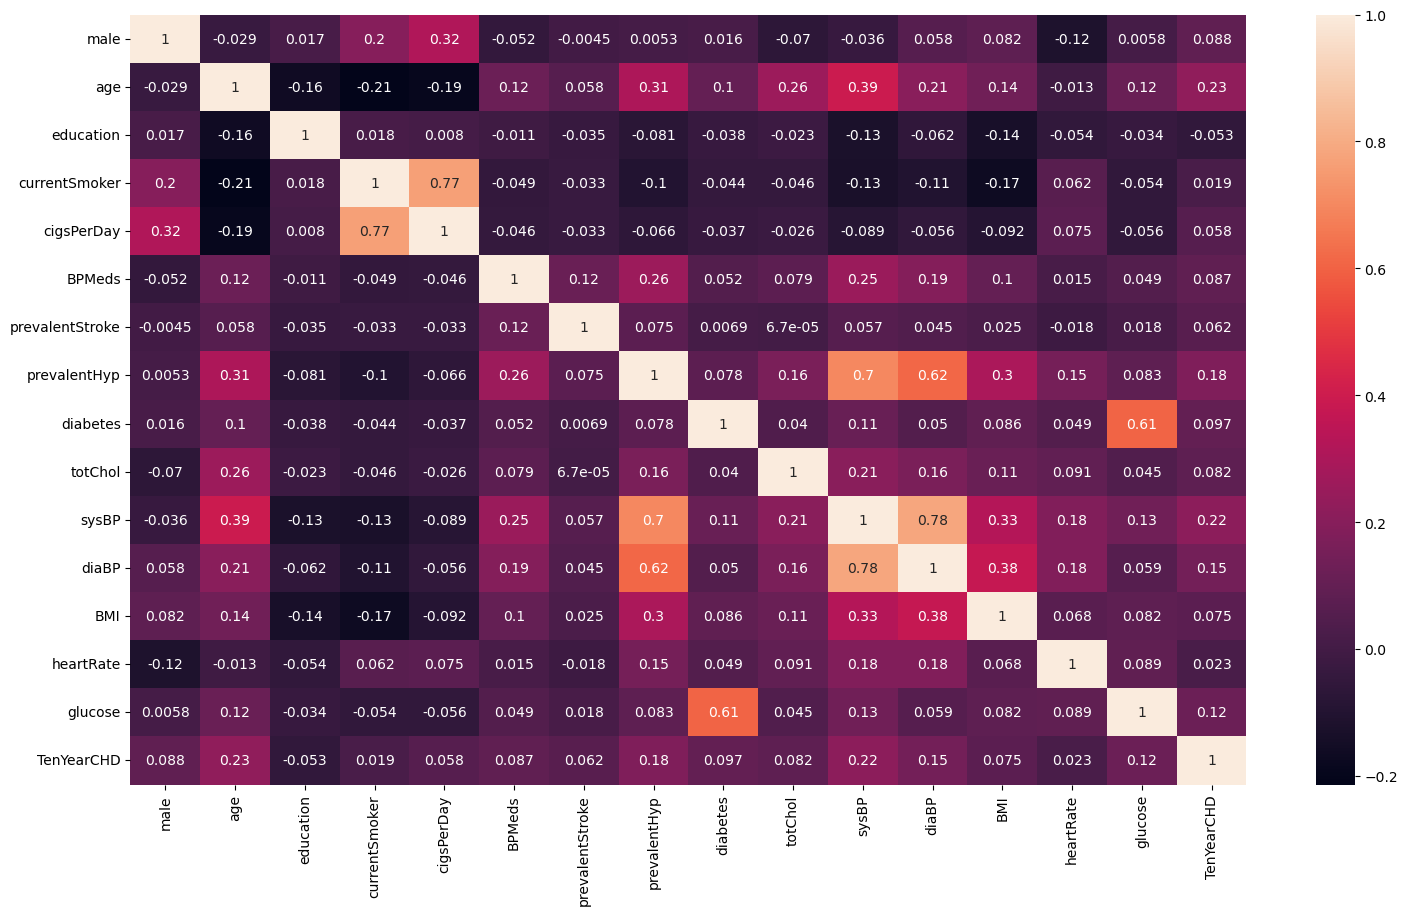

In [15]:
corr = heart_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show

In [16]:
# Assign all columns of the DataFrame to the category_features variable
category_features = heart_data.columns
print(category_features)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


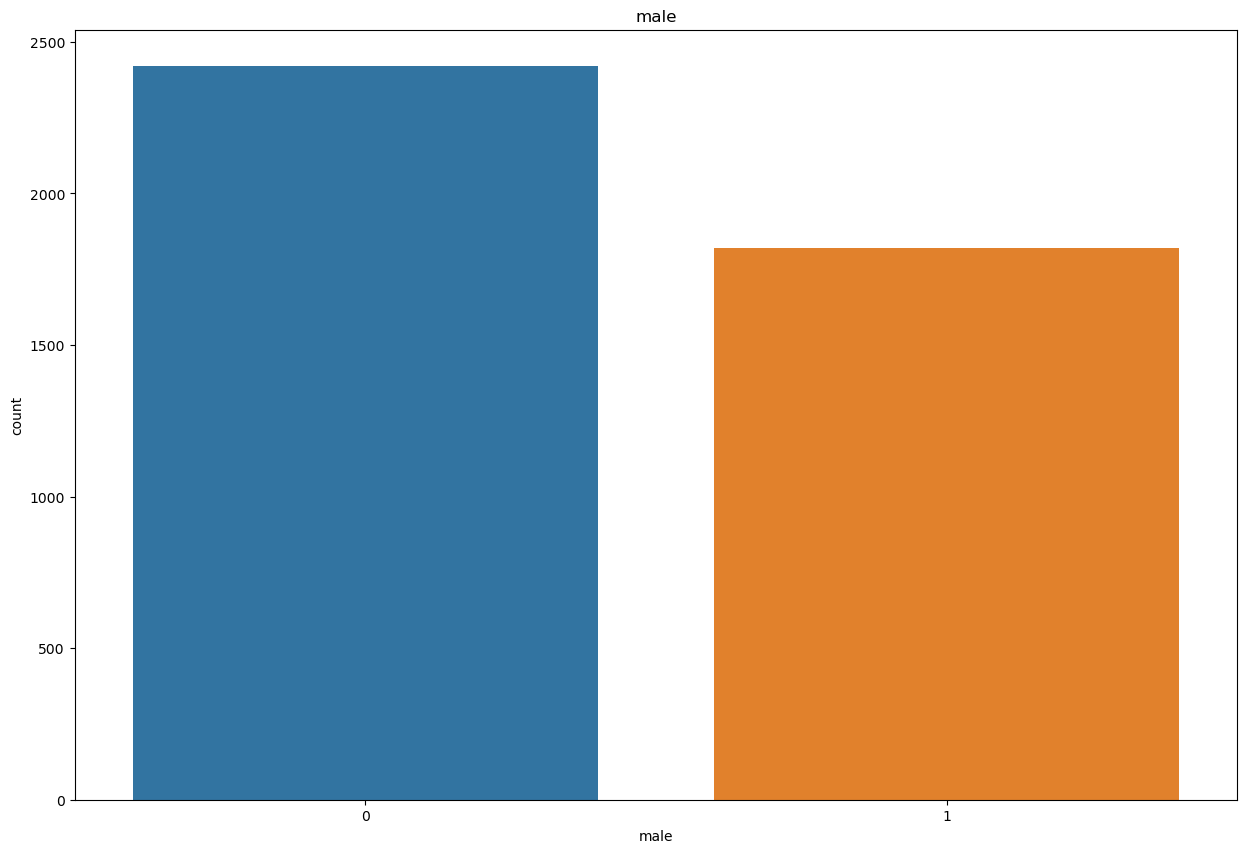

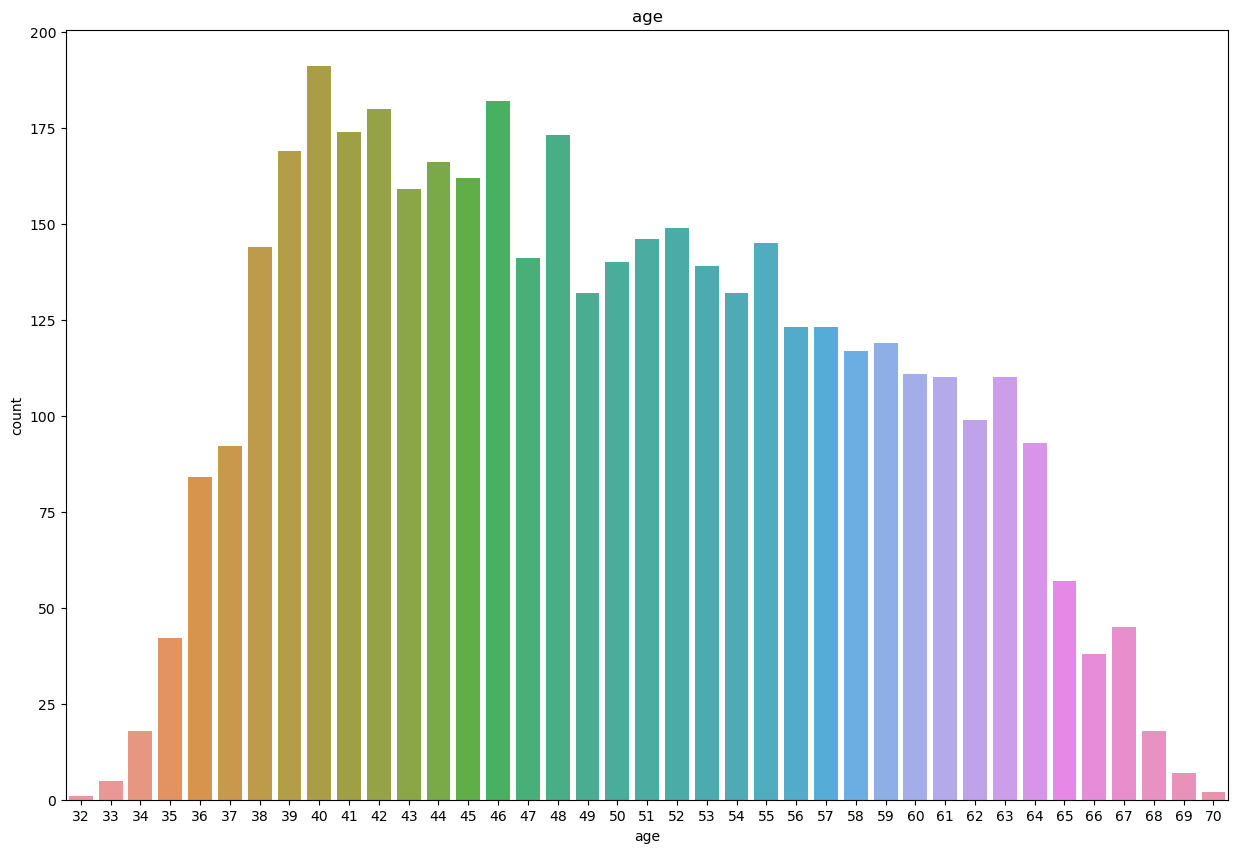

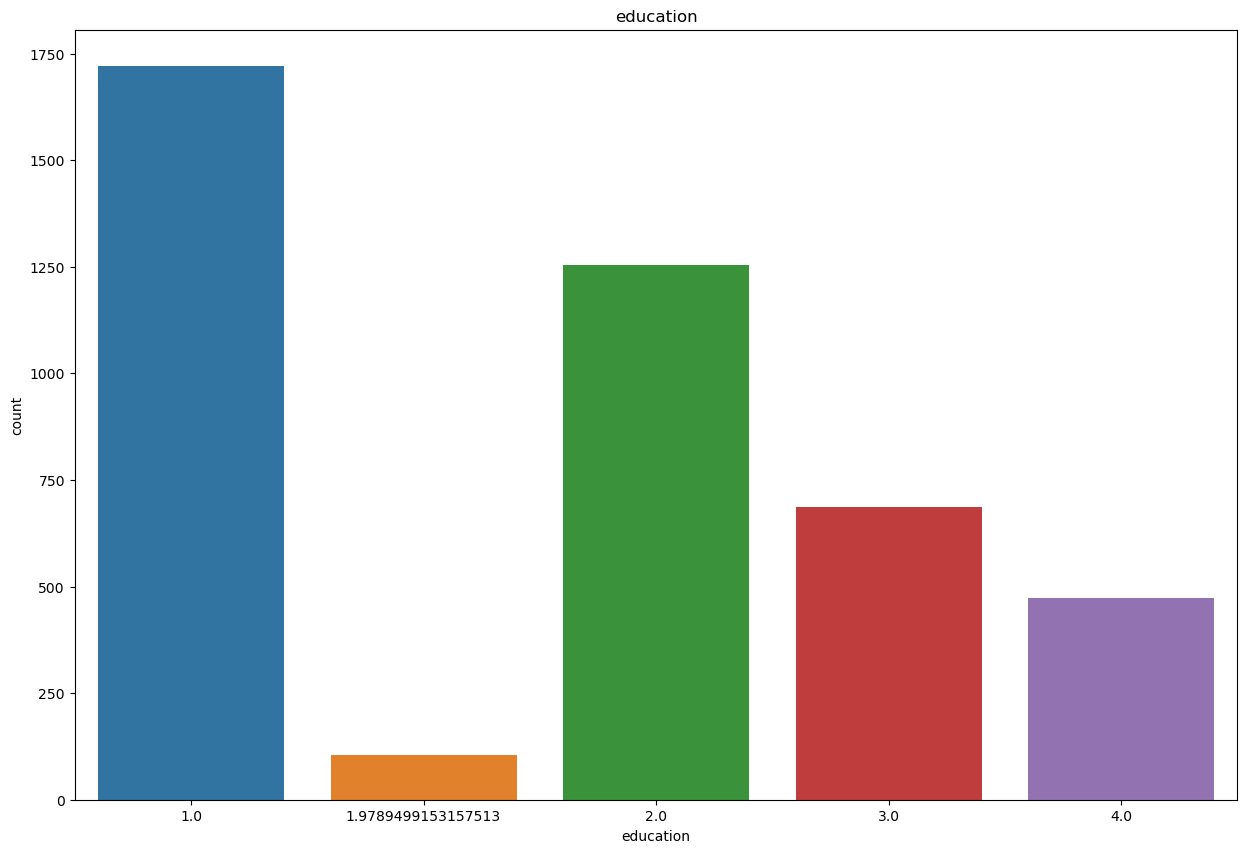

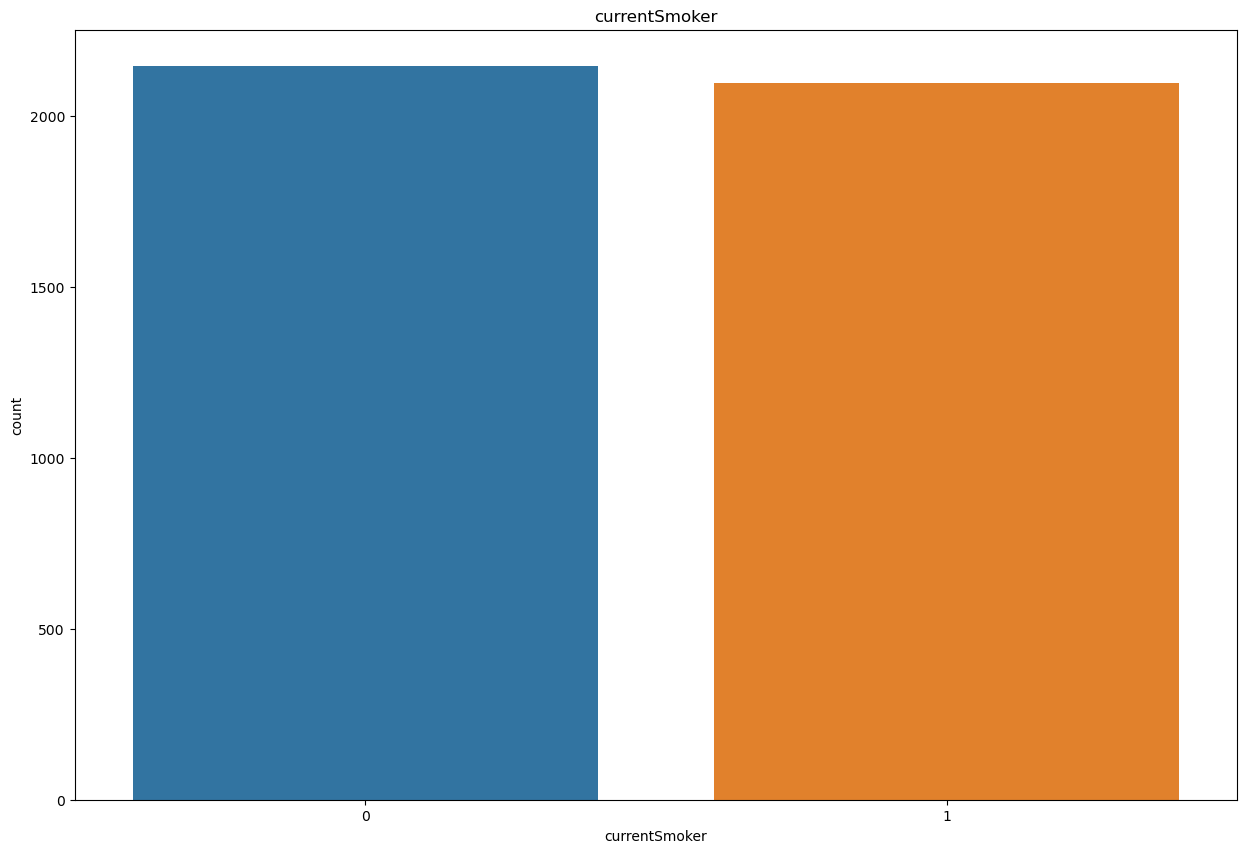

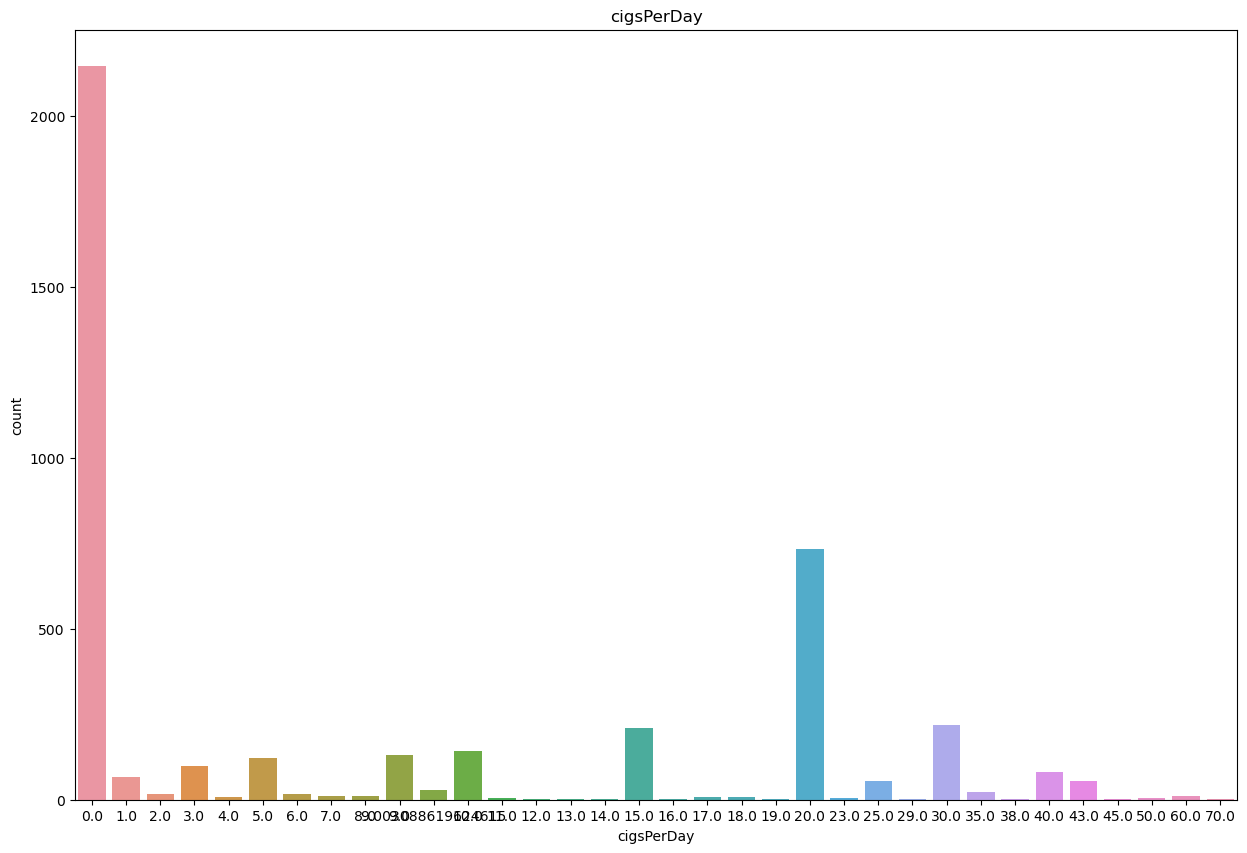

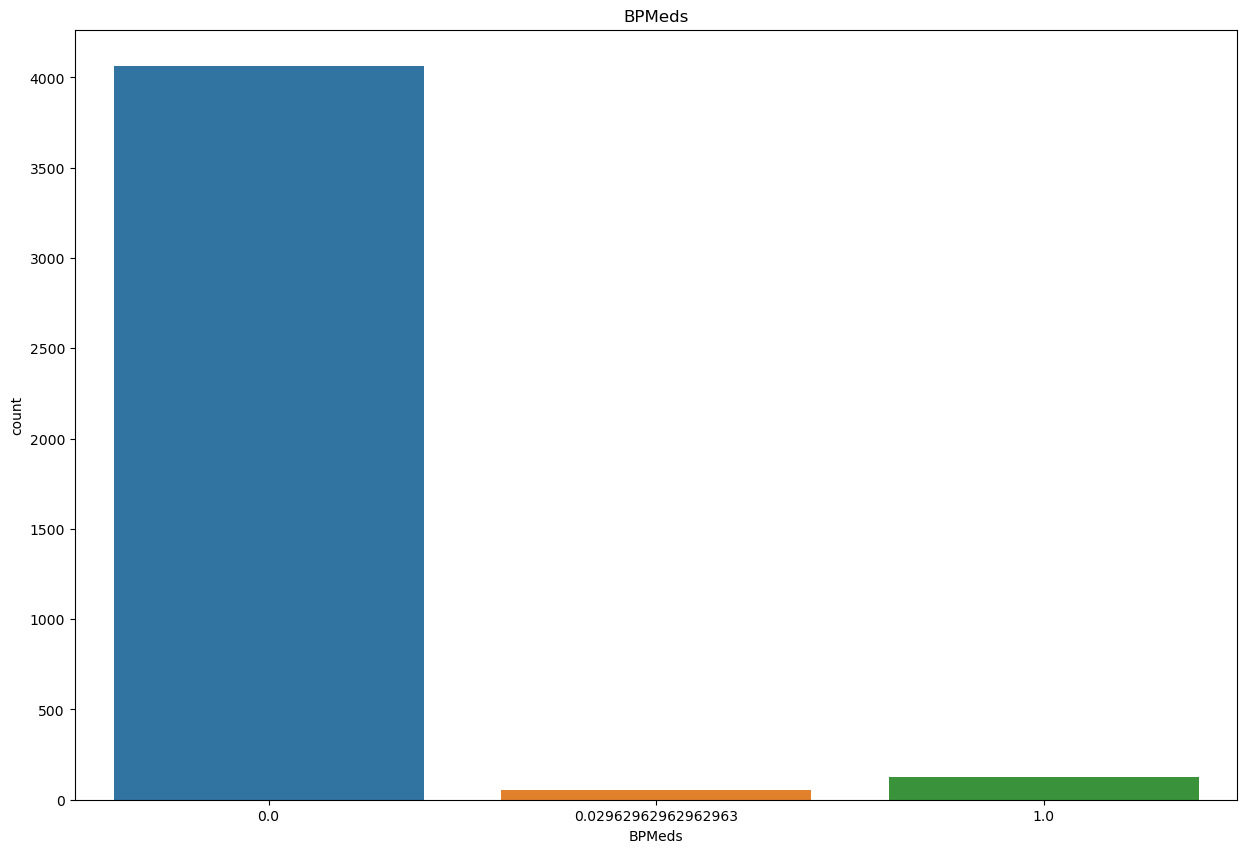

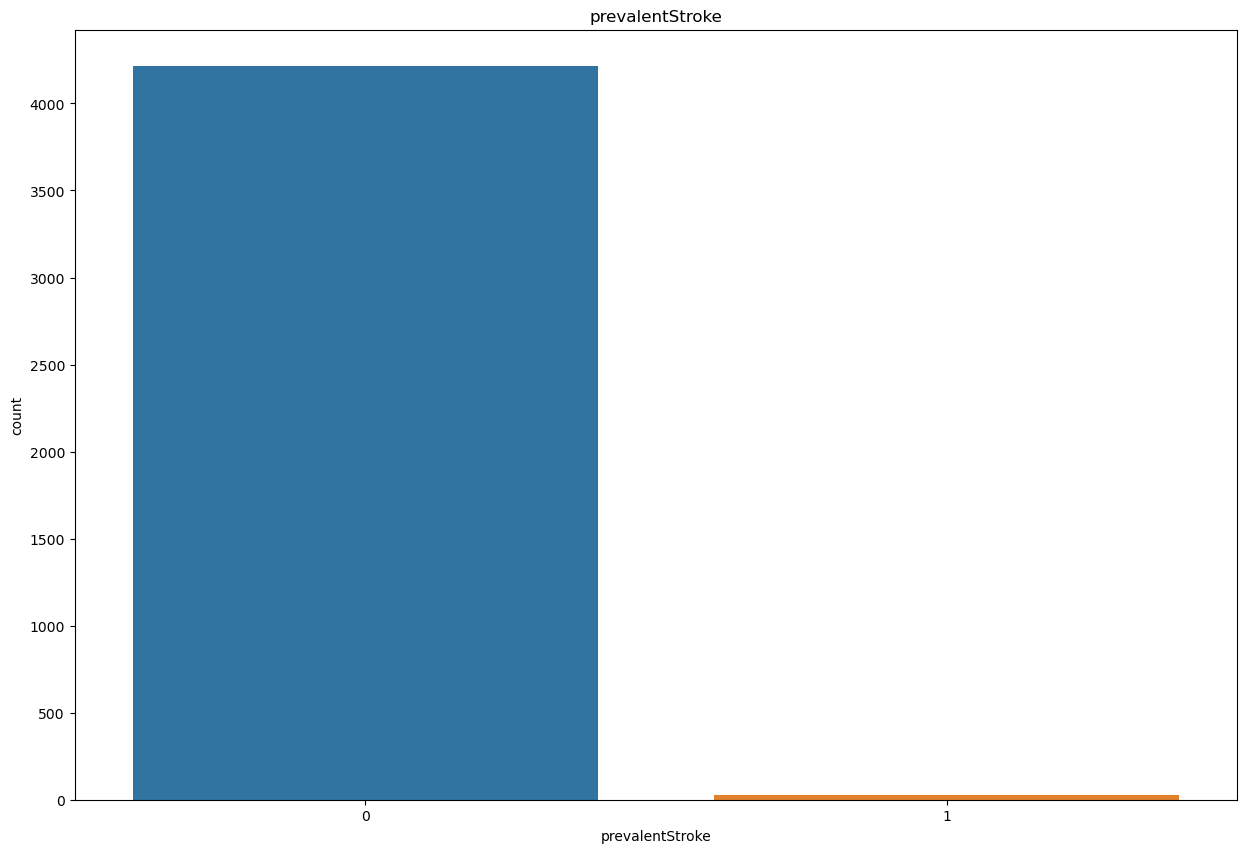

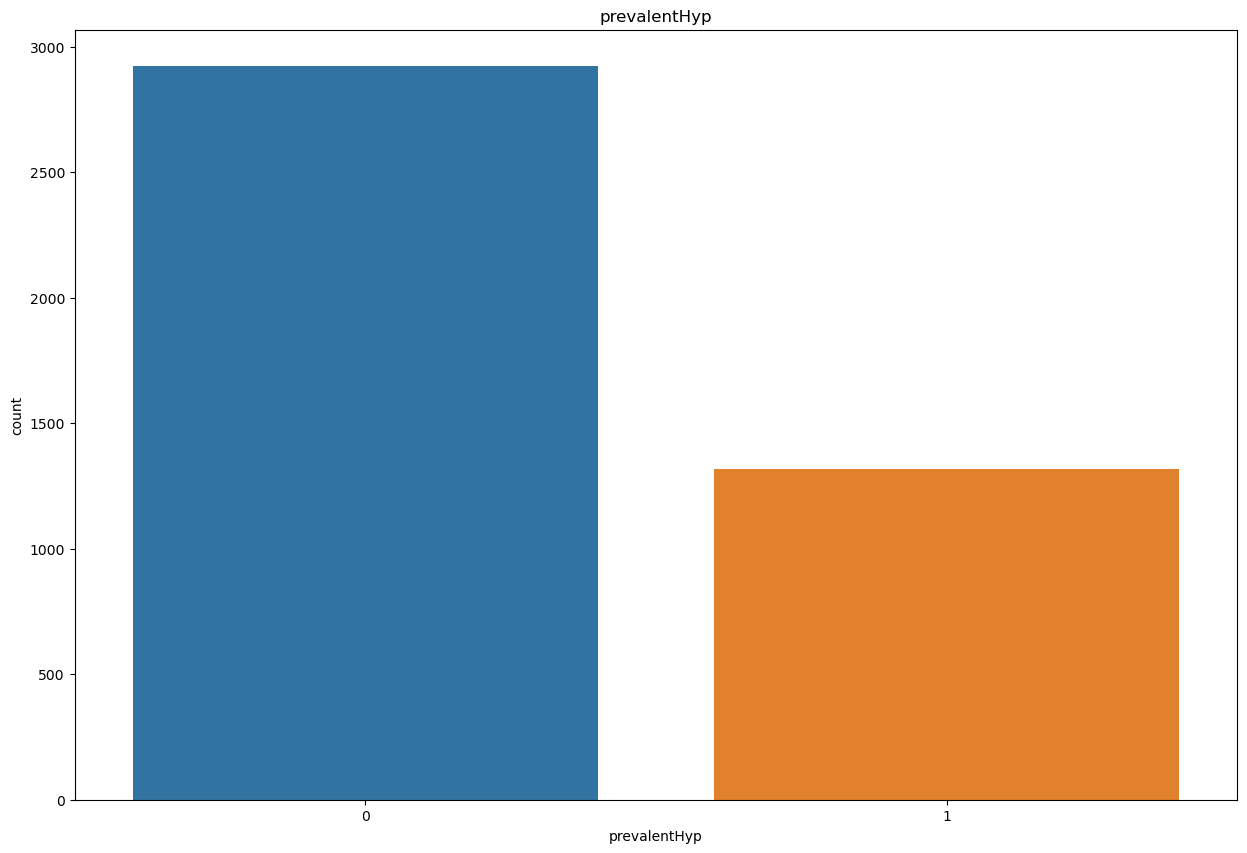

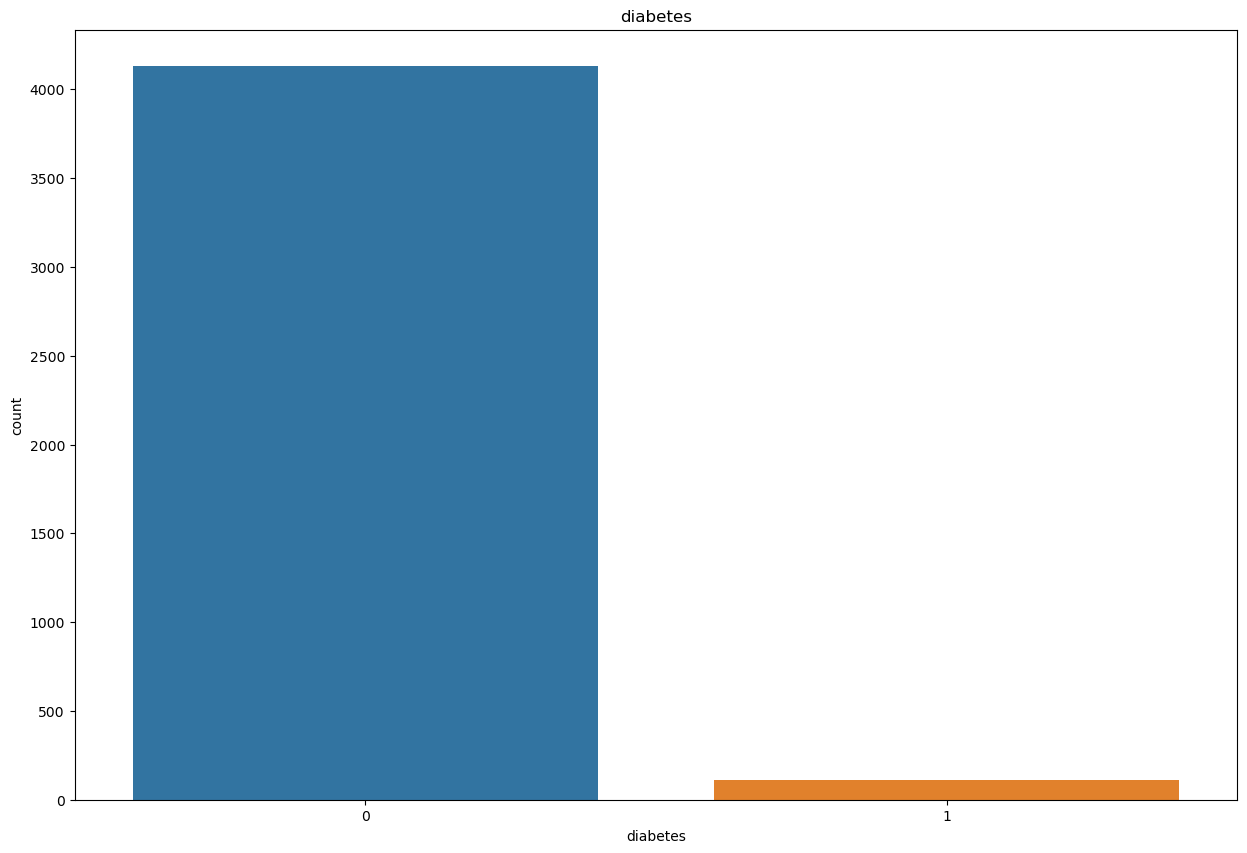

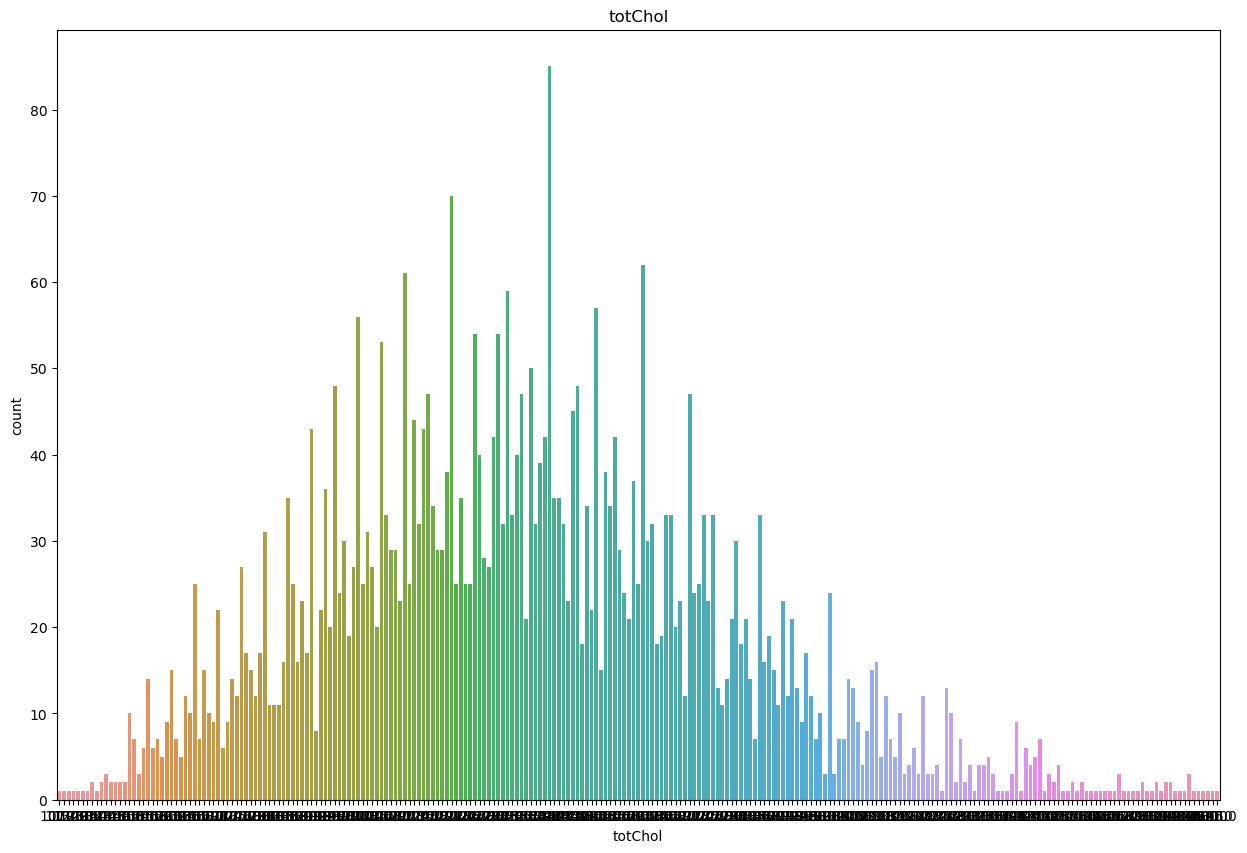

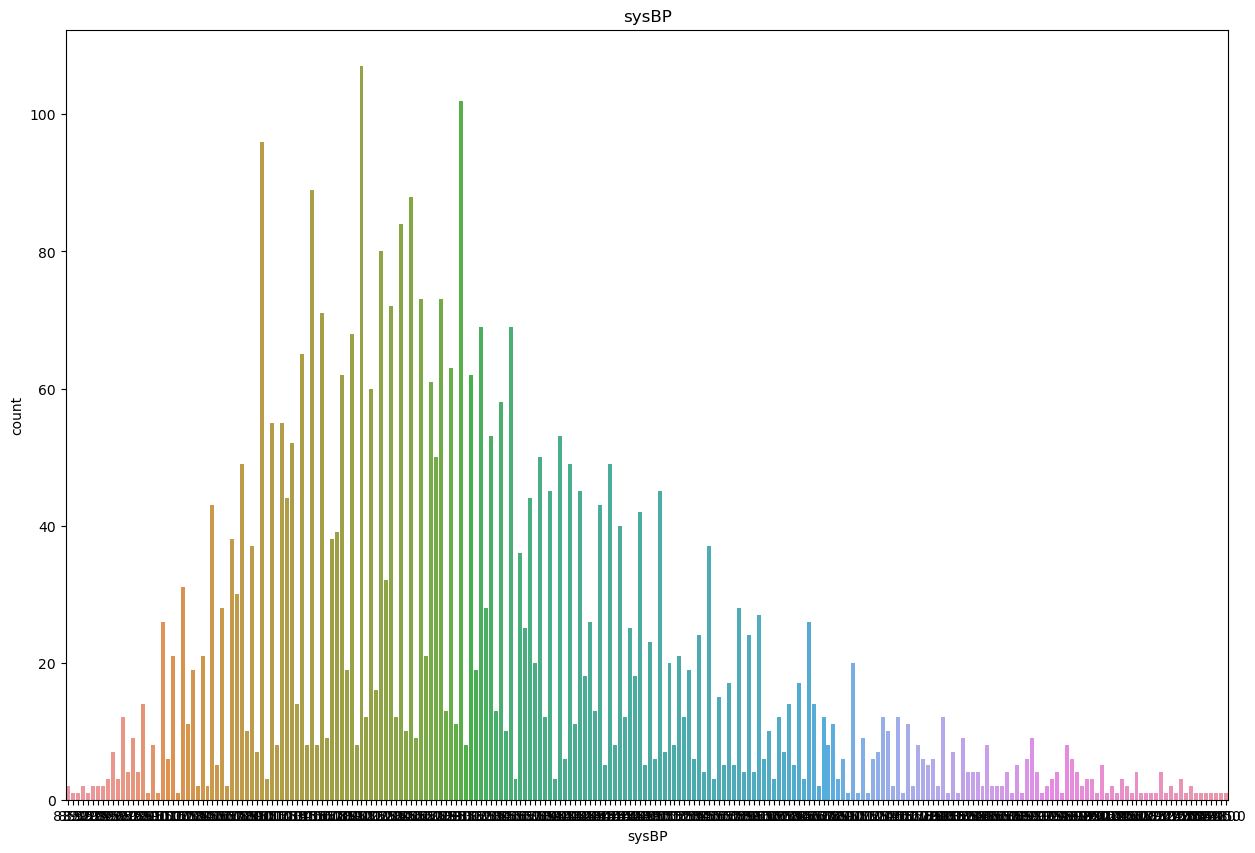

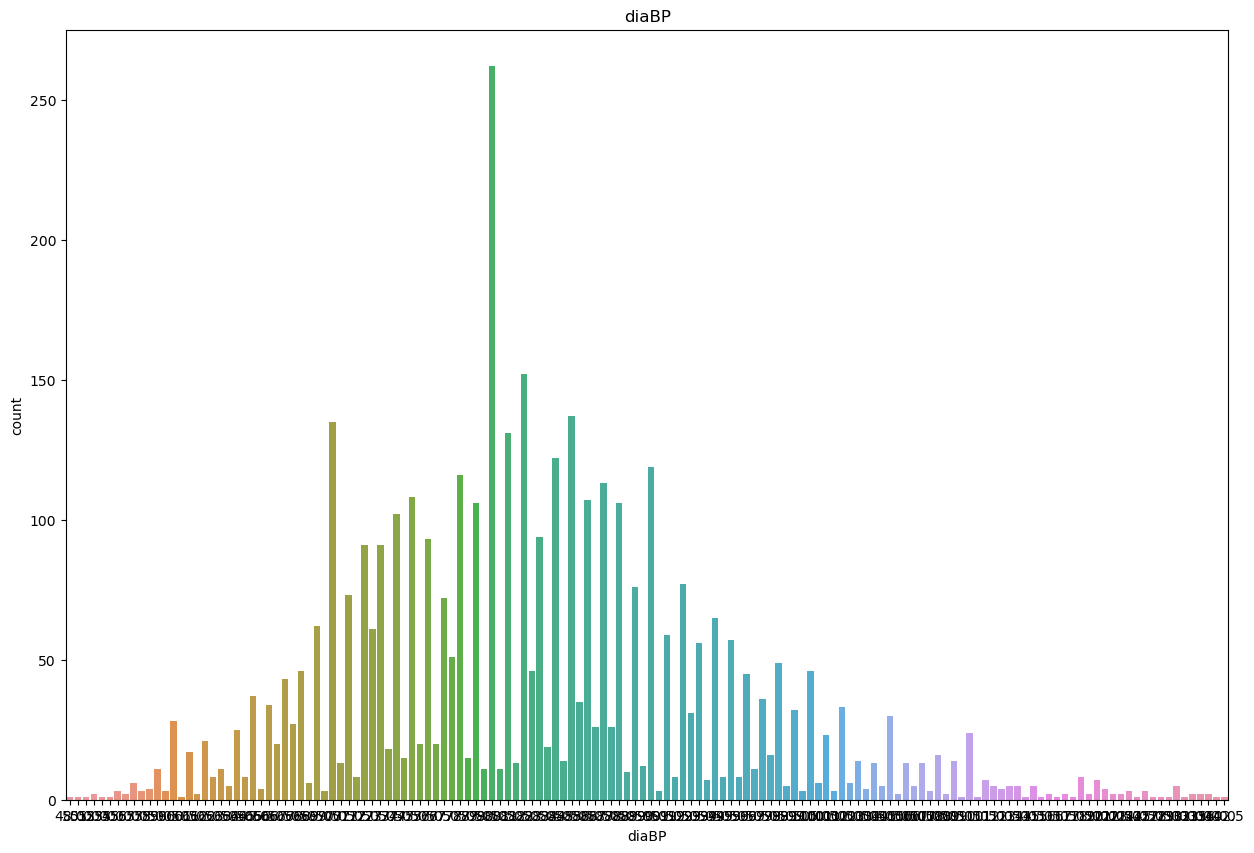

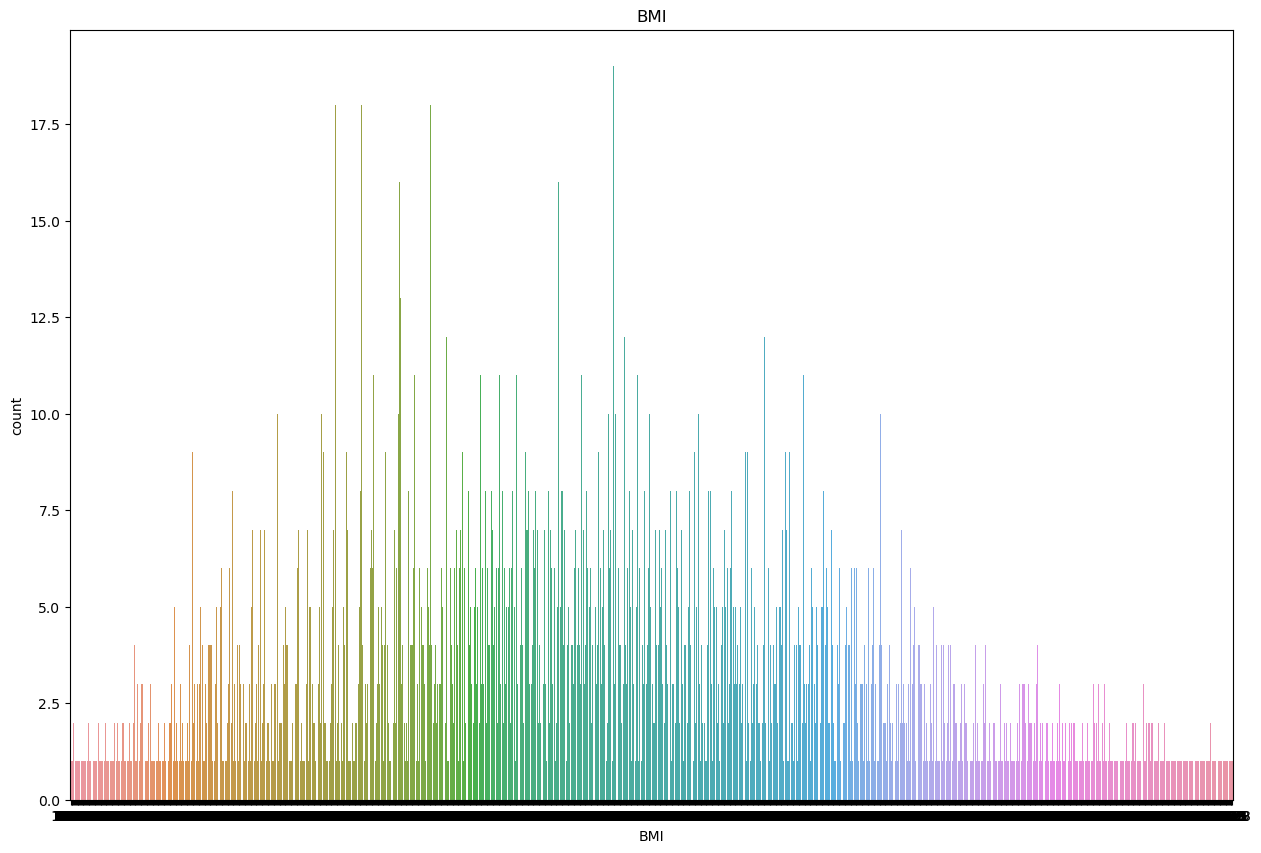

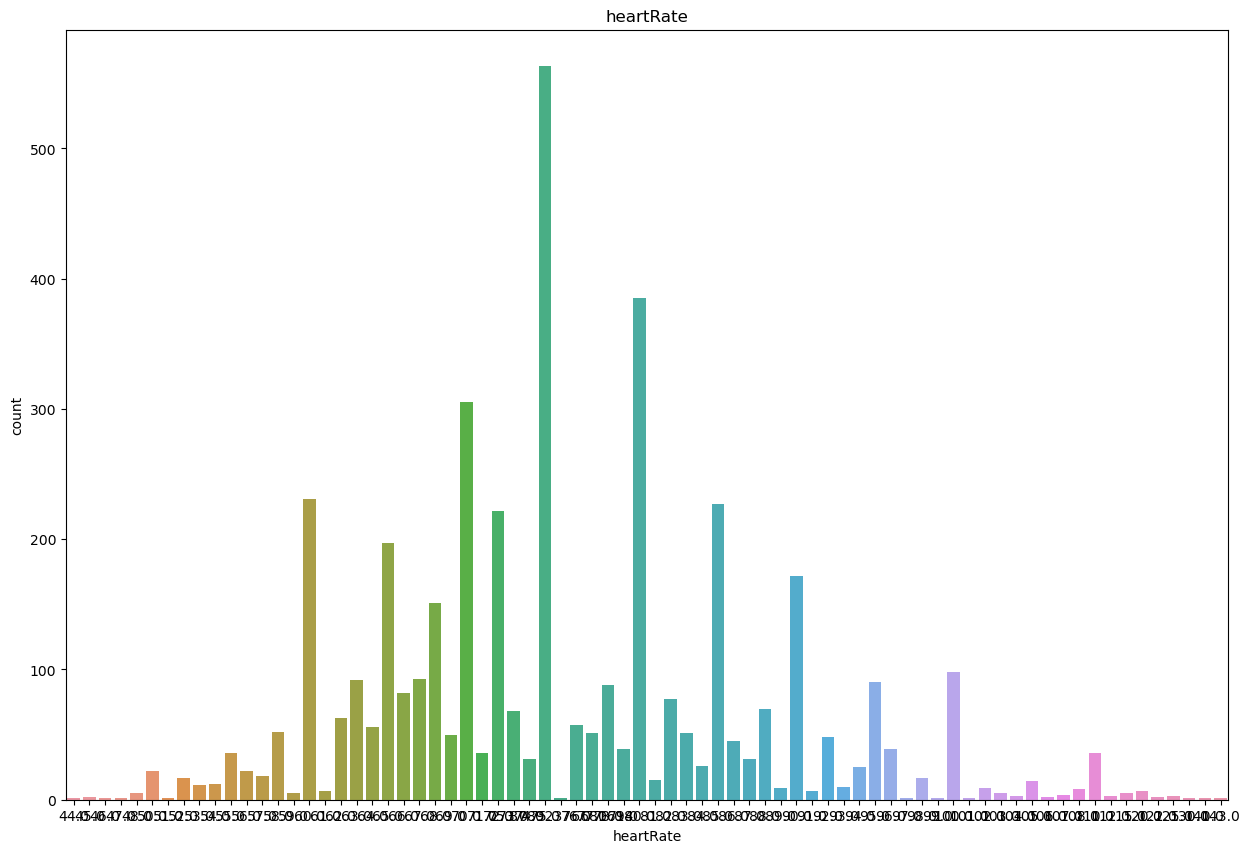

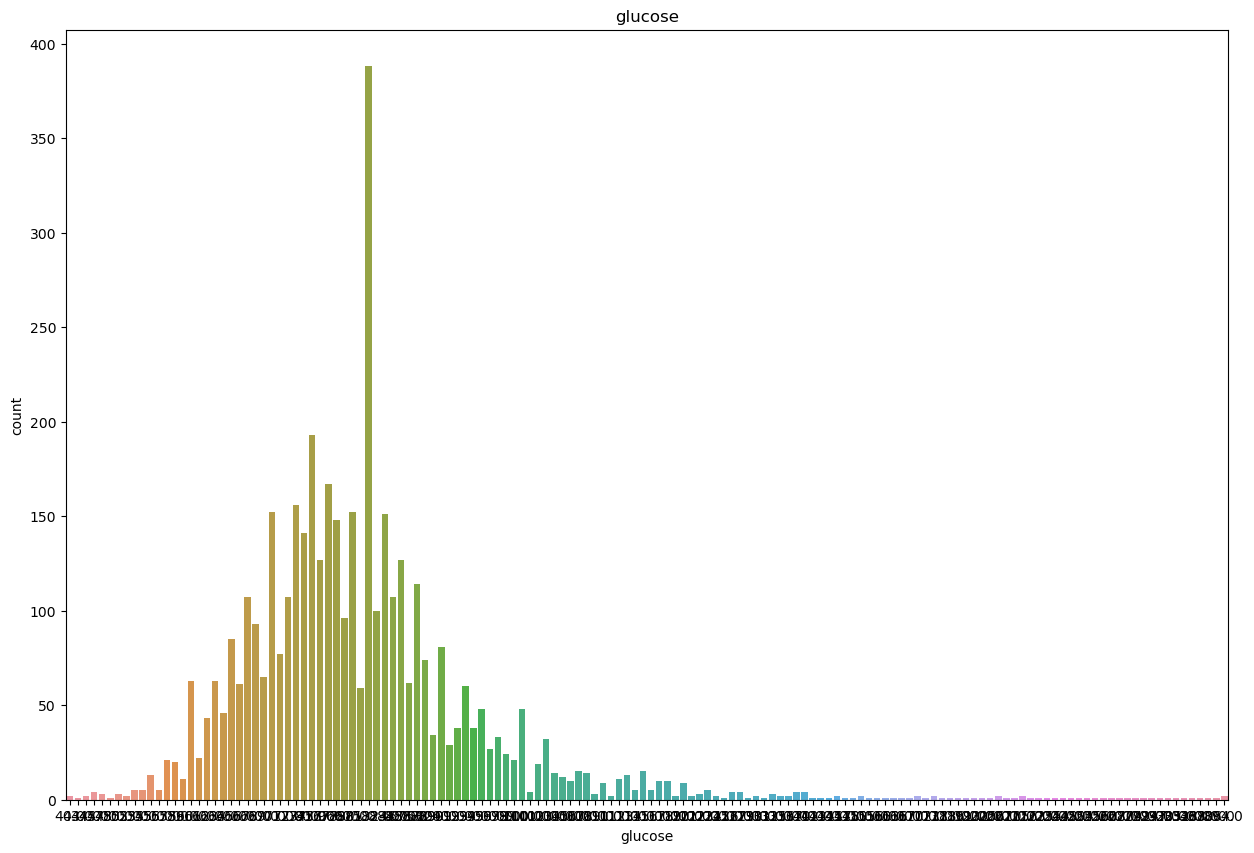

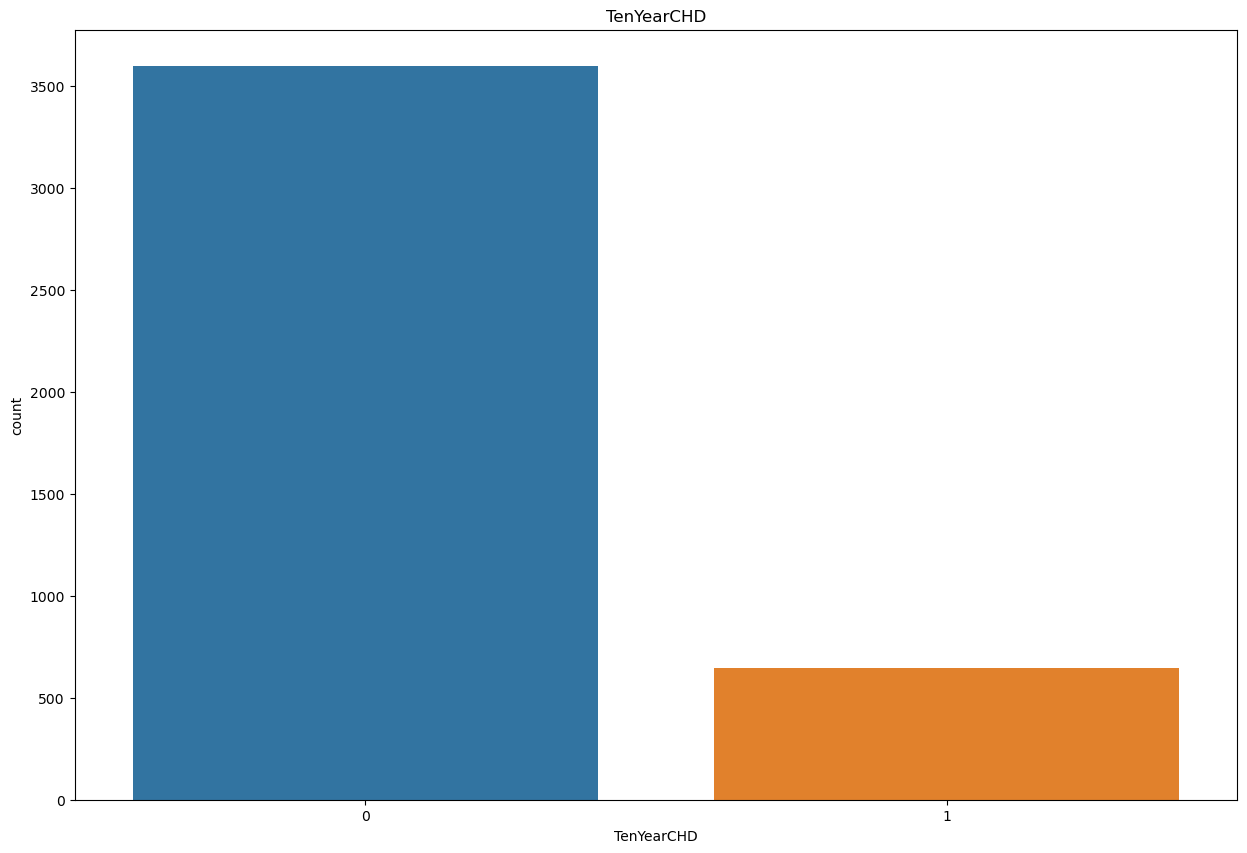

In [17]:
# count plot 
for column in category_features:
    
    plt.figure(figsize=(15,10))
    sns.countplot(x=heart_data[column],data=heart_data)
    plt.title(column)

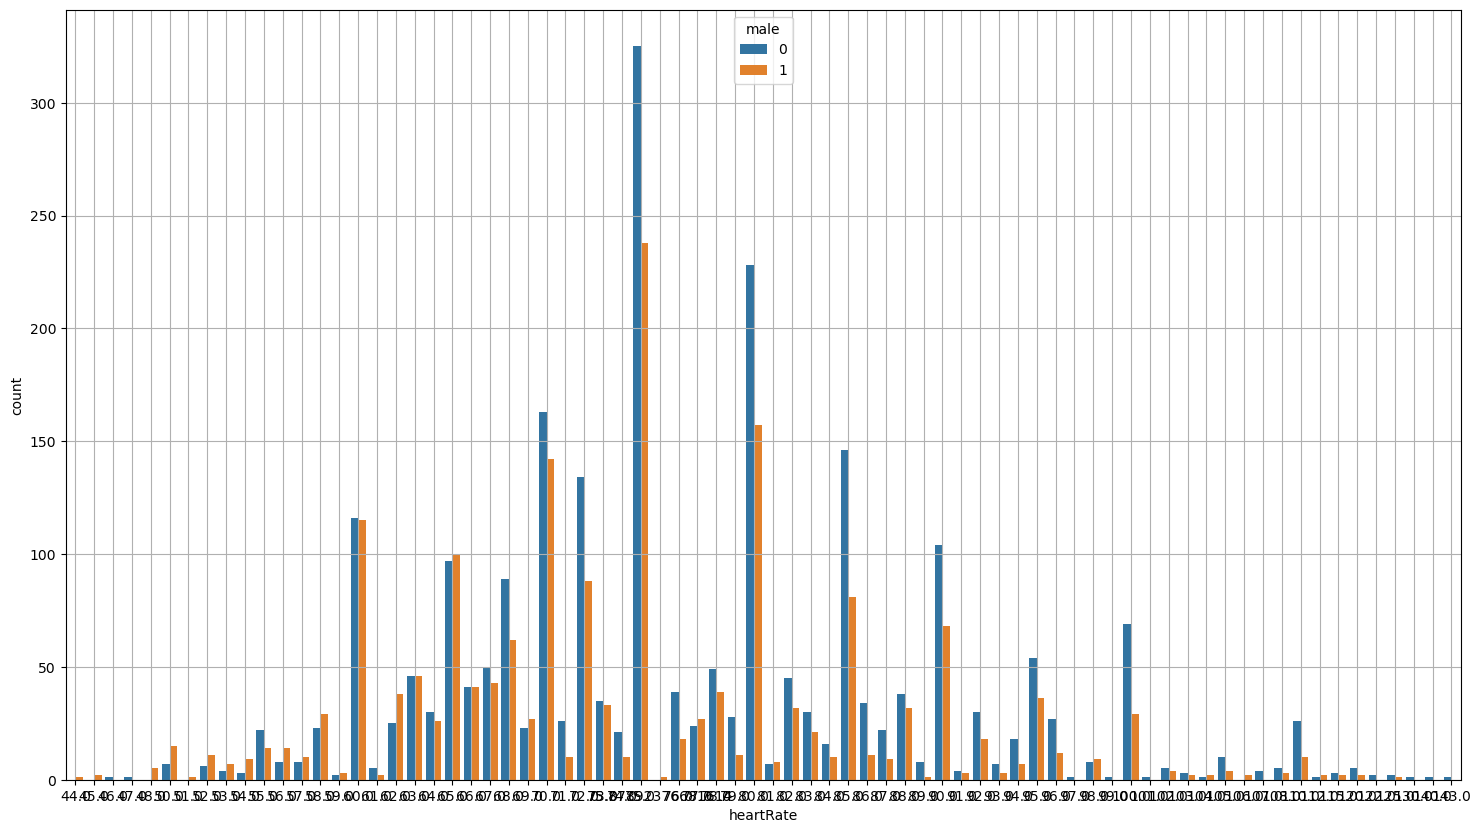

In [18]:
plt.figure(figsize=(18,10))
sns.countplot(x='heartRate',hue='male',data=heart_data)
plt.grid(True)
plt.show()

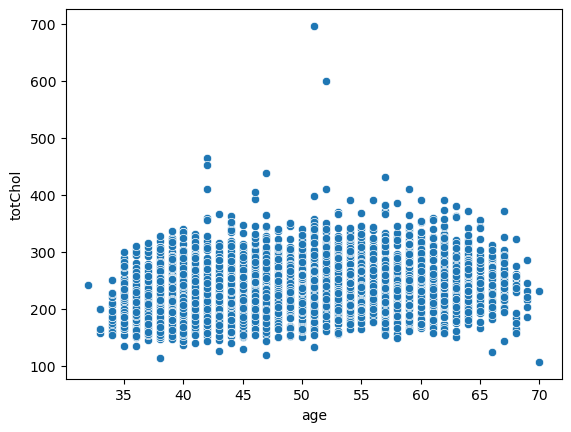

In [19]:
#Scatter plot
sns.scatterplot(x='age', y='totChol', data=heart_data)
plt.show()

* **In the scatter plot we can see in that the total chol is high in all the age group accept in 70** 

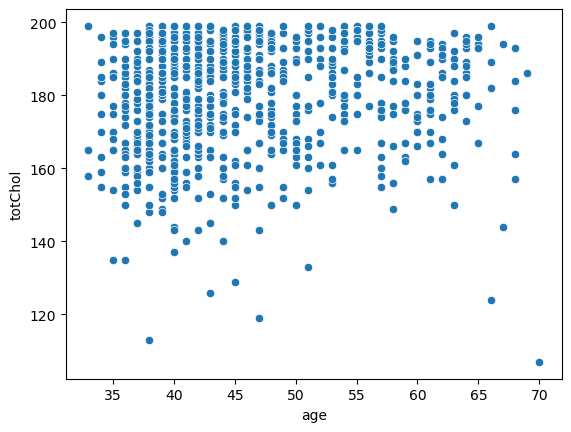

In [20]:
# Filter the data to include only rows where 'totChol' is below 200
heart_data = heart_data[heart_data['totChol'] < 200]

# Scatter plot
sns.scatterplot(x='age', y='totChol', data=heart_data)
plt.show()

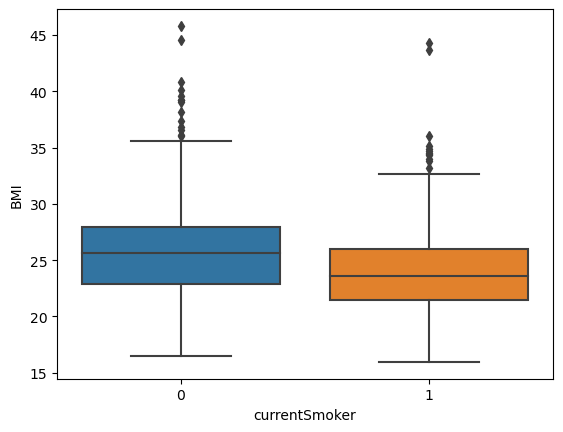

In [21]:
# now we see the outliers of box plot currentsmoker
sns.boxplot(x='currentSmoker', y='BMI', data=heart_data, showfliers=True)
plt.show()

In [22]:
heart_data[['BMI']].describe()


,BMI
count,829.000000
mean,24.939344
std,4.216966
min,15.960000
25%,22.050000
50%,24.380000
75%,26.980000
max,45.800000


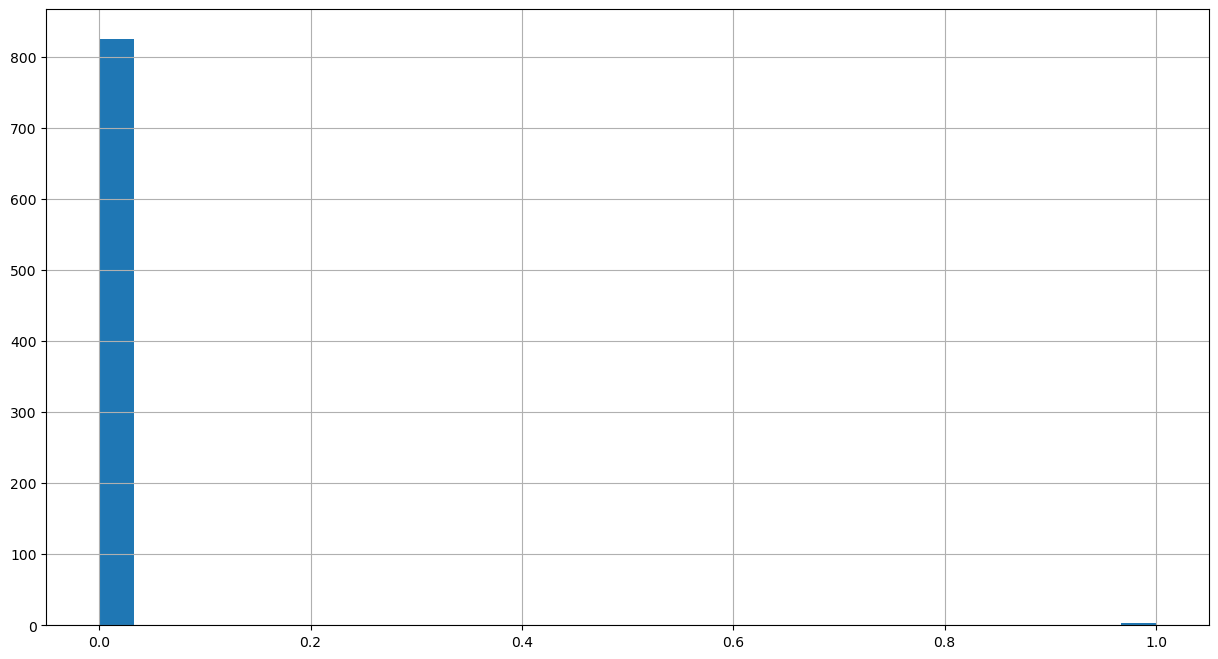

In [23]:
#Histogram
heart_data['prevalentStroke'].hist(bins=30,figsize=(15,8))
plt.show()

* **there are minor stroke is seen in prevalentStroke**

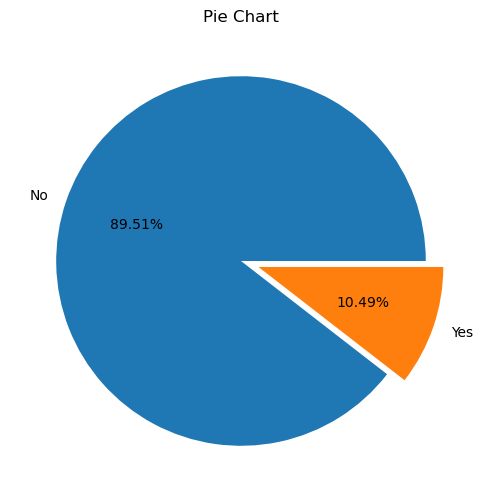

In [24]:
plt.figure(figsize=(10,6))
plt.pie(heart_data['TenYearCHD'].value_counts(),labels = ["No", "Yes"],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')
plt.show()

* **10.49% of the individuals in the data are likely to have Coronary Heart Disease (CHD) within 10 years**
* **89.51% of the individuals in the data are likely to have Coronary Heart Disease (CHD) within 10 years**

# MODEL BUILDING

In [42]:
X = heart_data.drop("TenYearCHD", axis=1)
y = heart_data["TenYearCHD"]

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict using the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 87.95%


In [46]:
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
# Comparing the predictions with the actual test labels
print(y_pred==y_test)

3176     True
2381     True
1531     True
2889     True
869      True
        ...  
4191     True
999      True
1836    False
3368     True
3978     True
Name: TenYearCHD, Length: 166, dtype: bool


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[146,   0],
       [ 20,   0]], dtype=int64)

In [49]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       146
           1       0.00      0.00      0.00        20

    accuracy                           0.88       166
   macro avg       0.44      0.50      0.47       166
weighted avg       0.77      0.88      0.82       166



Text(0, 0.5, 'True Positive Rate')

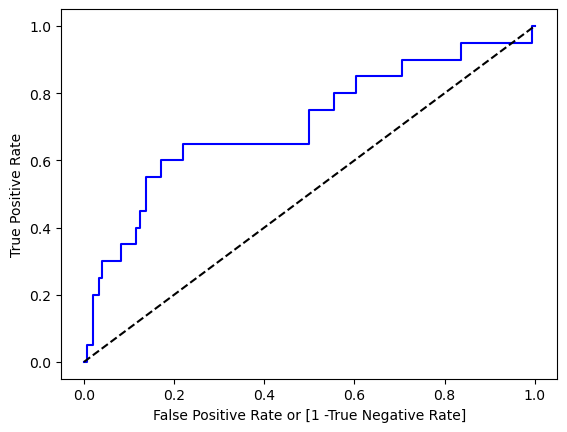

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,clf.predict_proba (X_test)[:,1])
auc = roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color = 'blue',label = 'logistic model (area = %0.2f)'%auc)
plt.plot([0,1],[0, 1],'k--')
plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
plt.ylabel('True Positive Rate')

In [41]:
auc

0.5